### LAB 2 - Netflix  

Name: Nguyễn Cao Sơn  
Student ID: 21127159  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Preprocessing  

In [2]:
# Read data
movie_data = pd.read_csv('../data/Netflix_Dataset_Movie.csv')  

rating_data = pd.read_csv('../data/Netflix_Dataset_Rating.csv')  

data = pd.merge(movie_data,rating_data, on='Movie_ID')



In [3]:
data.sample(6)

,Movie_ID,Year,Name,User_ID,Rating
6484779,1790,1966,Born Free,2210387,4
8284231,2186,1995,Bad Boys,265152,5
7493940,2009,1999,The Talented Mr. Ripley,1147935,3
763049,241,1959,North by Northwest,442584,4
4859726,1307,2003,S.W.A.T.,2620409,4
9584219,2519,2004,A Love Song for Bobby Long,1638955,4


In [4]:
data.dtypes

Movie_ID     int64
Year         int64
Name        object
User_ID      int64
Rating       int64
dtype: object

- `Movie_ID`     : ID of movie  
- `Year`         : year release  
- `Name`         : name of movie  
- `User_ID`      : ID of user  
- `Rating`       : Rating of user for movie  

In [5]:
data.shape

(17337458, 5)

In [6]:
data.describe().round(2)

,Movie_ID,Year,User_ID,Rating
count,17337458.00,17337458.00,17337458.00,17337458.00
mean,2302.78,1993.89,1321157.68,3.59
std,1303.46,12.49,764692.26,1.06
min,3.00,1920.00,6.00,1.00
25%,1176.00,1990.00,660228.00,3.00
50%,2342.00,1999.00,1316775.00,4.00
75%,3433.00,2002.00,1983213.00,4.00
max,4496.00,2005.00,2649429.00,5.00


In [7]:
# check for missing values
data.isnull().sum()


Movie_ID    0
Year        0
Name        0
User_ID     0
Rating      0
dtype: int64

In [8]:
# check for duplicates
data.duplicated().sum()

0

-  We dont have duplicate values in this dataset.

In [9]:
# movie rating
movie_rating = data.groupby('Movie_ID')['Rating'].mean()

# Tạo DataFrame mới từ kết quả của groupby
movie_rating_df = pd.DataFrame({'Movie_ID': movie_rating.index, 'Rating(mean)': movie_rating.values})

# Kết hợp thông tin tên phim vào DataFrame mới
movie_rating_df = movie_rating_df.merge(data[['Movie_ID', 'Name', 'Year']], on='Movie_ID')
movie_rating_df = movie_rating_df.drop_duplicates(subset=['Movie_ID'])


In [10]:
movie_rating_df.head()

,Movie_ID,Rating(mean),Name,Year
0,3,3.621391,Character,1997
1524,8,3.136795,What the #$*! Do We Know!?,2004
10903,16,3.081843,Screamers,1996
13420,17,2.909964,7 Seconds,2005
17585,18,3.767597,Immortal Beloved,1994


## 2. Visualization

### Câu hỏi 1: Đâu là 5 bộ phim được đánh giá cao nhất?


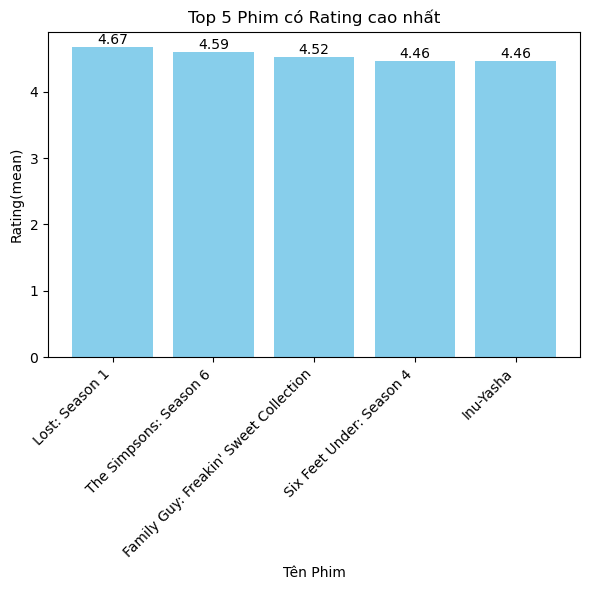

In [11]:

# top 5 movie have the highest rating:
top_movies = movie_rating_df.sort_values(by='Rating(mean)', ascending=False).head(5)

plt.figure(figsize=(6, 6))
bars = plt.bar(top_movies['Name'], top_movies['Rating(mean)'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Tên Phim')
plt.ylabel('Rating(mean)')
plt.title('Top 5 Phim có Rating cao nhất')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Trả lời:  
5 bộ phim được đánh giá cao nhất là:
- Lost: Season 1    
- The Simpsons: Season 6  
- Family Guy: Freakin' Sweet Collection  
- Six Feet Under: Season 4  
- Inu-Yasha  

### Câu hỏi 2: Những năm nào sản xuất ra nhiều phim được đánh giá tốt nhất?


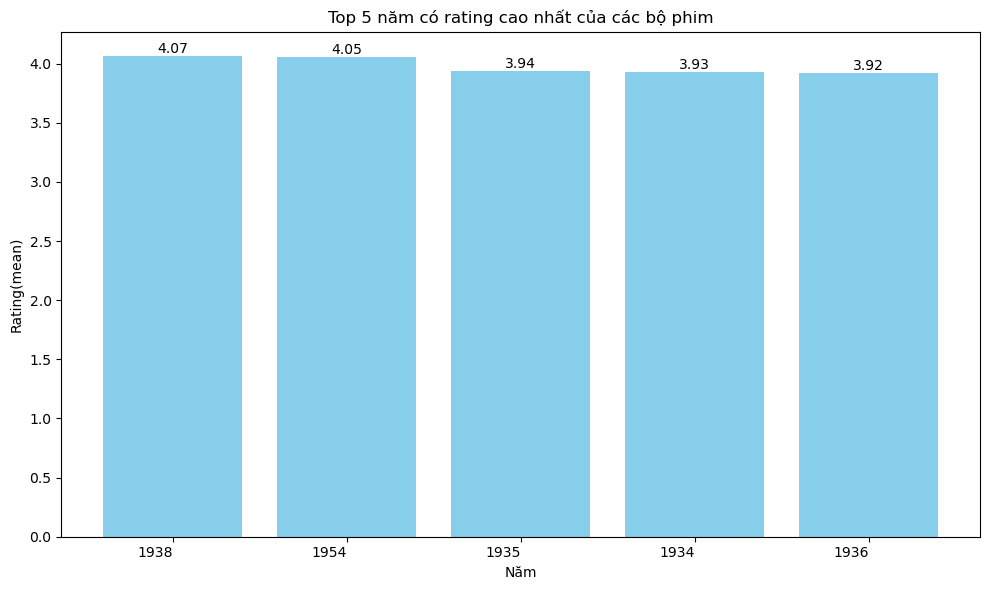

In [12]:
yearly_rating = movie_rating_df.groupby('Year')['Rating(mean)'].mean()

# Sắp xếp theo rating giảm dần và chọn top 5 năm
top_5_years = yearly_rating.sort_values(ascending=False).head(5)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_years.index.astype(str), top_5_years.values, color='skyblue')

# Thêm số chính xác lên đầu mỗi thanh
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.xlabel('Năm')
plt.ylabel('Rating(mean)')
plt.title('Top 5 năm có rating cao nhất của các bộ phim')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

Trả lời: 1938, 1954, 1935, 1934, 1936  
- Có vẻ phim thời xưa dù kỹ xảo và kỹ thuật kém nhưng nội dung lại rất hay.  
### Câu hỏi 3: Quá trình phát triển của những bộ phim vào cuối thế kỉ thế kỉ XX và đầu thế kỉ XXI thế nào?  

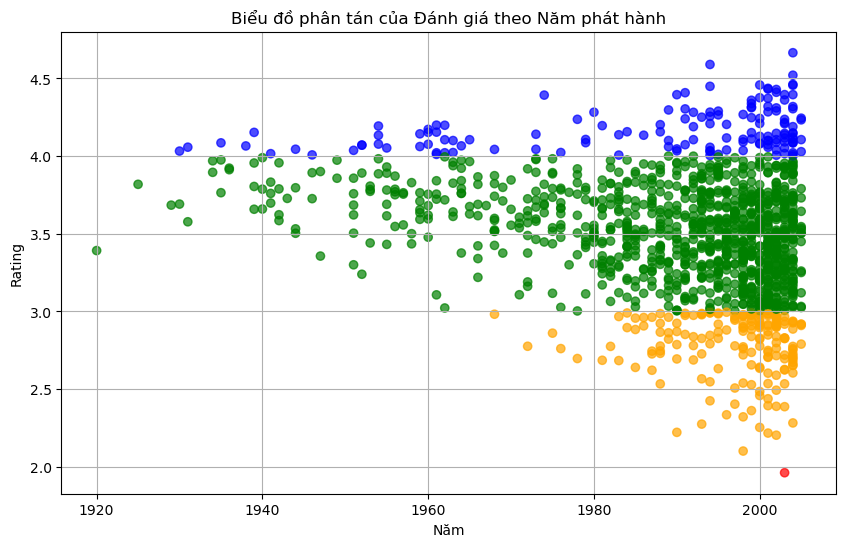

In [13]:
# Tạo một mảng màu dựa trên rating
colors = np.where(movie_rating_df['Rating(mean)'] <= 2, 'red',
          np.where(movie_rating_df['Rating(mean)'] <= 3, 'orange',
          np.where(movie_rating_df['Rating(mean)'] <= 4, 'green', 'blue')))

# Tạo scatter plot với màu được tùy chỉnh
plt.figure(figsize=(10, 6))
plt.scatter(movie_rating_df['Year'], movie_rating_df['Rating(mean)'], c=colors, alpha=0.7)
plt.xlabel('Năm')
plt.ylabel('Rating')
plt.title('Biểu đồ phân tán của Đánh giá theo Năm phát hành')
plt.grid(True)
plt.show()

Trả lời:  
- Càng về thời gian sau thì ngành điện ảnh càng phát triển và có nhiều bộ phim được sản xuất ra.
- Tuy nhiên giai đoạn nào cũng có nhiều phim hay nhưng giai đoạn 1980-2000 thì cũng có khá nhiều phim được đánh giá thấp. Có thể là do điện ảnh tiếp cận được nhiều người nên dẫn đến một số tác phẩm không phù hợp với thị hiếu khán giả và được đánh giá thấp hơn.
- Tuy nhiên cũng có nhưng phim dở tệ ( dấu màu đỏ trên biểu đồ) nằm ở mức không thể chấp nhận được dù được sản suất sau năm 2000.
